In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:

test=pd.read_csv("C:\\Users\\abhin\\Downloads\\test_QoiMO9B.csv")

In [3]:
df1=pd.read_csv("C:\\Users\\abhin\\Downloads\\fulfilment_center_info.csv")

In [4]:

test_df1=pd.merge(test,df1,on='center_id')
test_df1.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [5]:
df3=pd.read_csv("C:\\Users\\abhin\\Downloads\\meal_info.csv")
df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
test_df2=pd.merge(test_df1,df3,on='meal_id')
test_df=pd.merge(test_df1,df3,on='meal_id')


In [7]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental


In [8]:
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [9]:
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [10]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental


In [11]:
num=test_df.select_dtypes(include=['number']).columns
cat=test_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['center_type', 'category', 'cuisine'], dtype='object')
num: Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area'],
      dtype='object')


In [12]:
cat

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [13]:
for i in cat: 
    a=test_df[i].unique()
    print(i,a)

center_type ['TYPE_C' 'TYPE_B' 'TYPE_A']
category ['Beverages' 'Rice Bowl' 'Starters' 'Sandwich' 'Extras' 'Pizza' 'Seafood'
 'Other Snacks' 'Desert' 'Salad' 'Pasta' 'Fish' 'Biryani' 'Soup']
cuisine ['Thai' 'Indian' 'Italian' 'Continental']


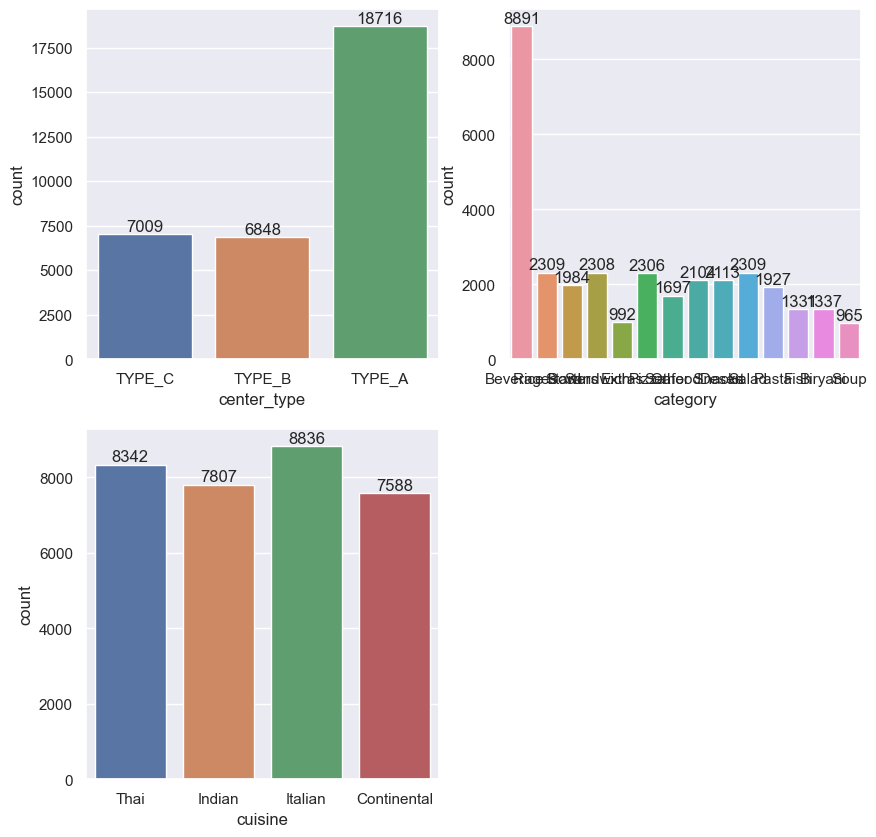

In [14]:
plt.figure(figsize=(10,10))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)

    ax=sns.countplot(data=test_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

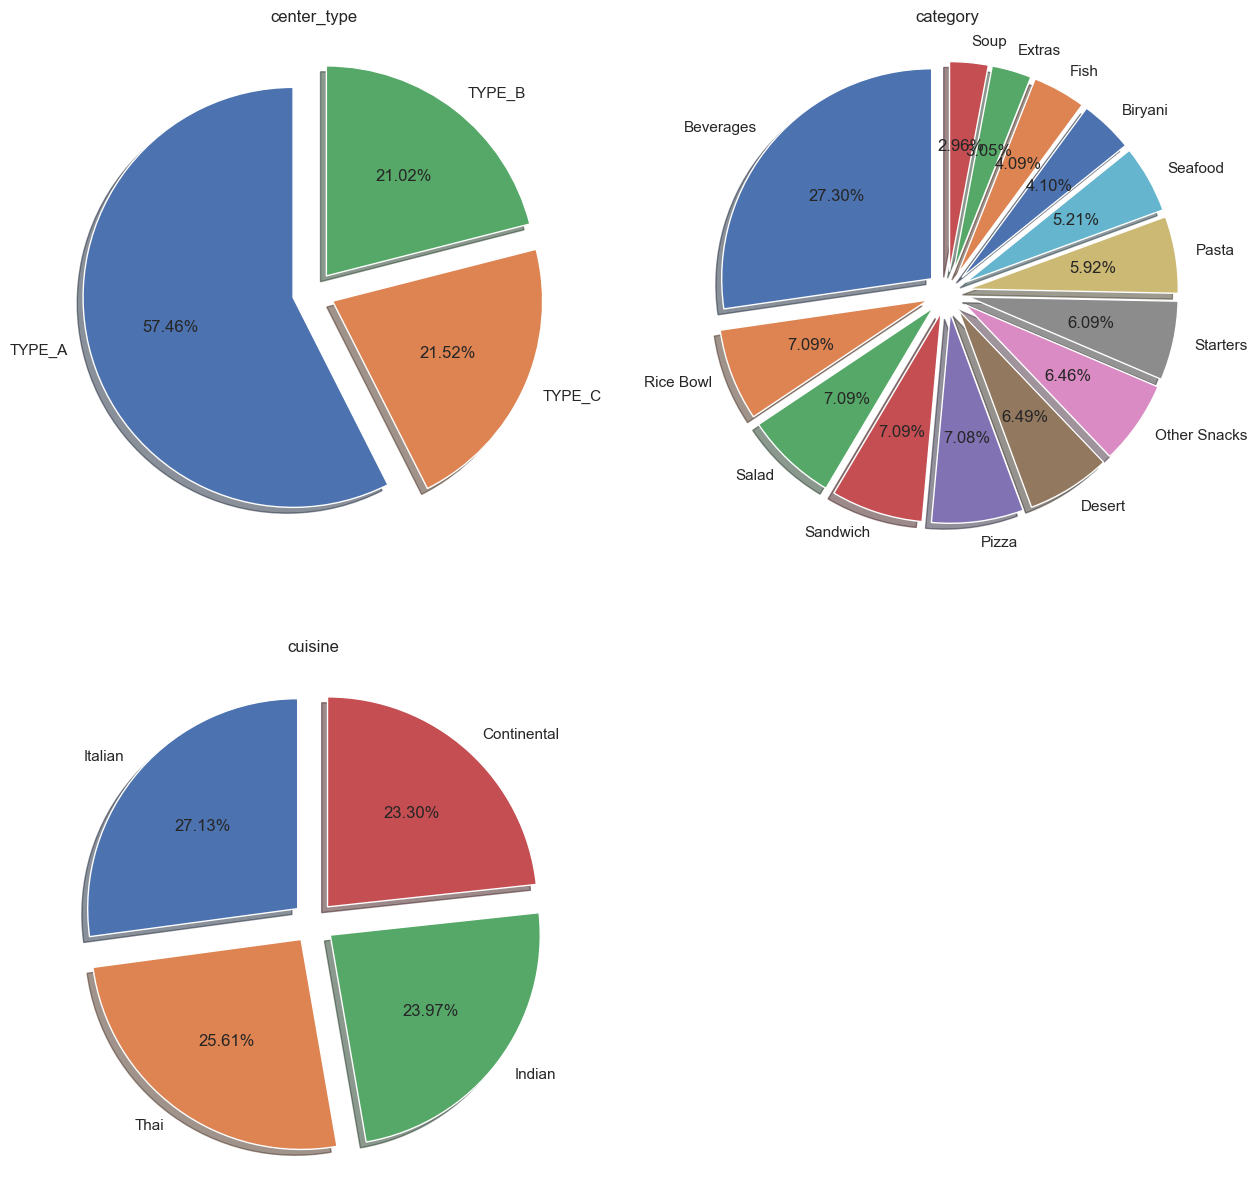

In [15]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(2,2,i+1)
    test_df[column].value_counts()
    Property=test_df[column].value_counts(normalize=True).keys()
    count=test_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=test_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

In [16]:
test_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356,601.519971,56.712154,4.087726
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385,65.996677,17.641174,1.098835
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000,556.000000,34.000000,3.600000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000,596.000000,56.000000,4.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000,651.000000,77.000000,4.500000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,713.000000,93.000000,7.000000


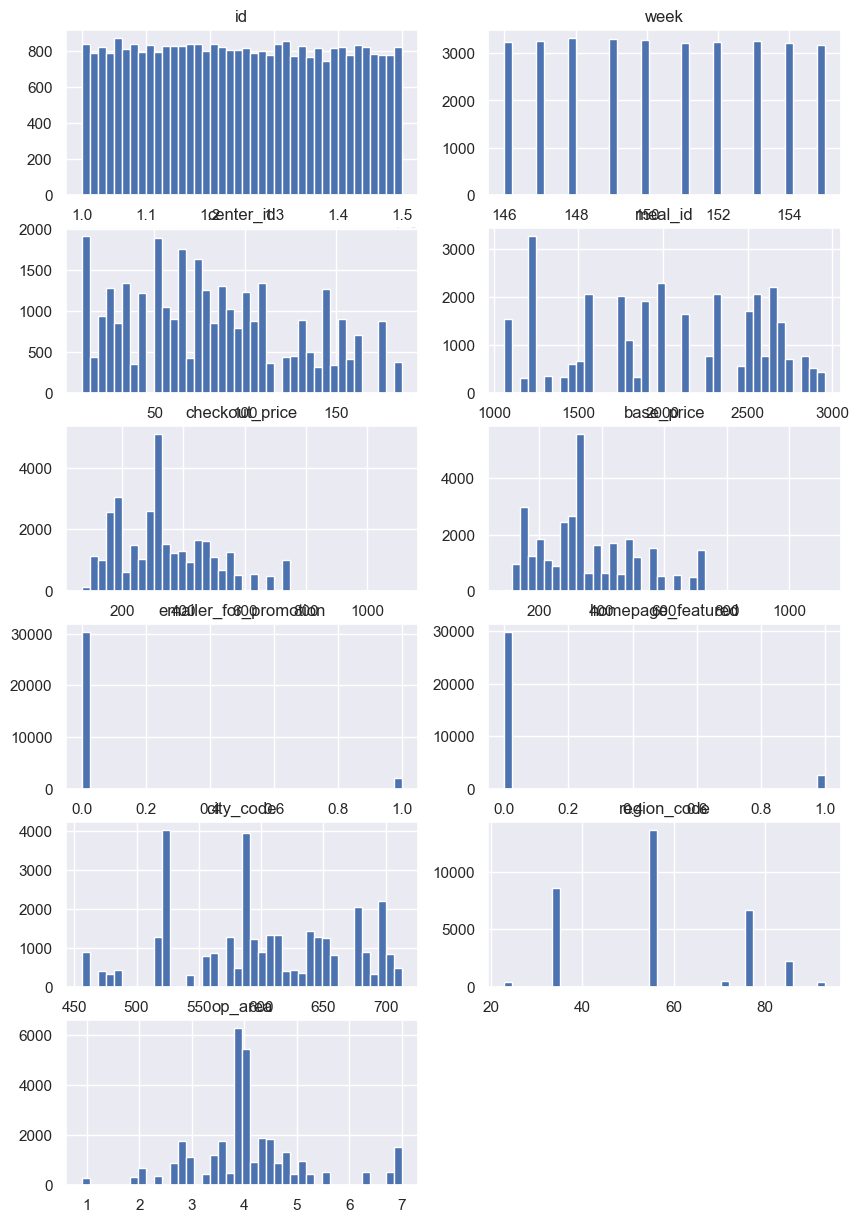

In [17]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(6,2,i+1)
    plt.title(column)
    plt.hist(test_df[column],bins=40)
plt.show()

In [18]:
for i in (num):
    print(i,test_df[i].skew())

id 0.01581057200169066
week 0.011814038972617338
center_id 0.349886093538324
meal_id -0.1744243635363114
checkout_price 0.6072184995889919
base_price 0.664258880017547
emailer_for_promotion 3.482024974330676
homepage_featured 3.062861856570428
city_code -0.21133902094305662
region_code 0.05442597954274791
op_area 0.6385572547320573


In [19]:
num

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area'],
      dtype='object')

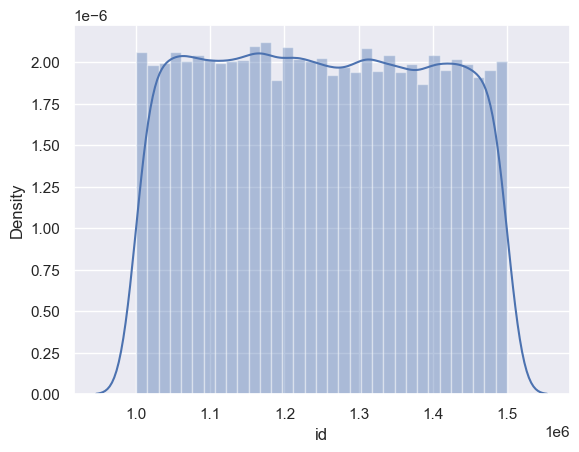

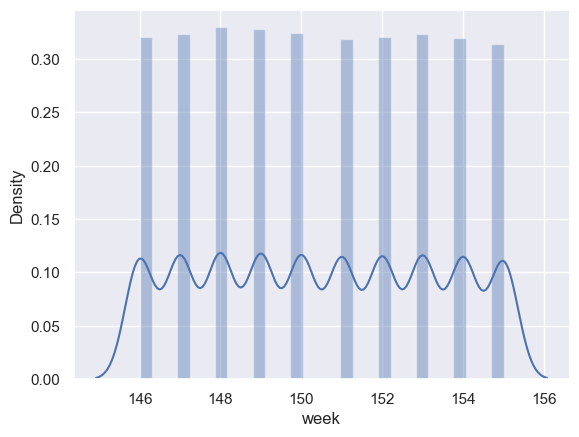

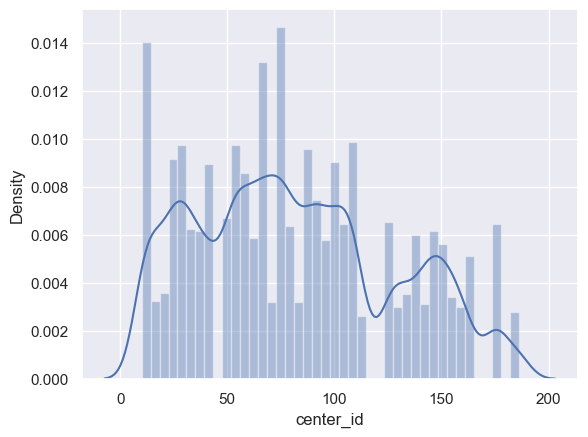

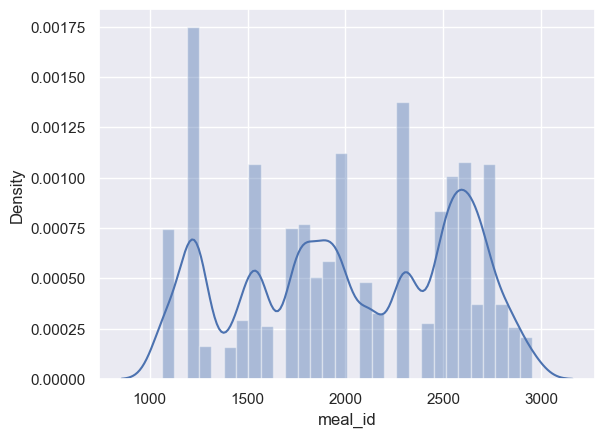

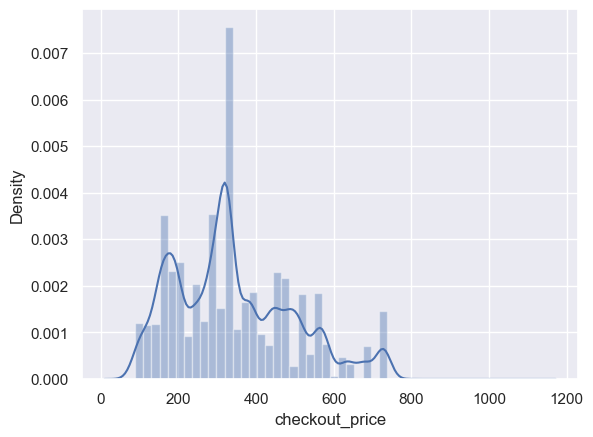

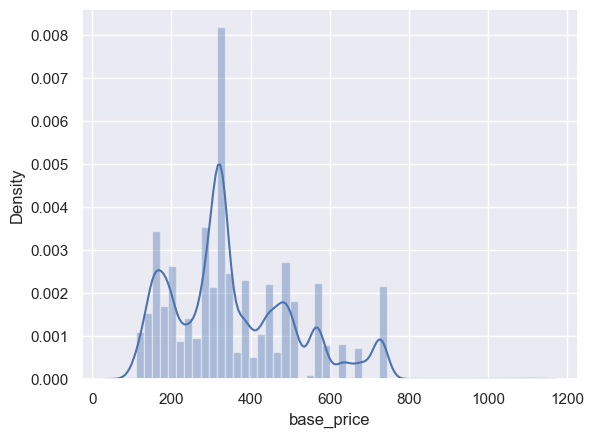

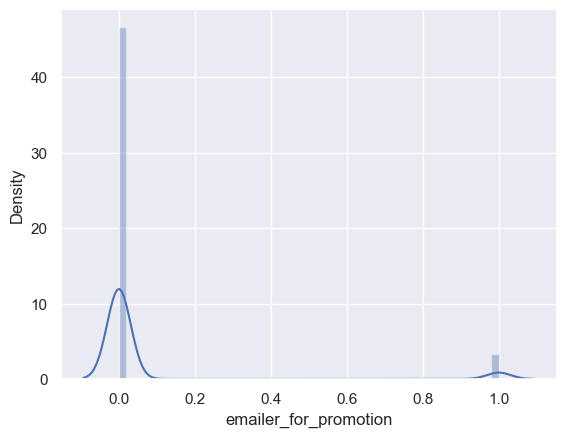

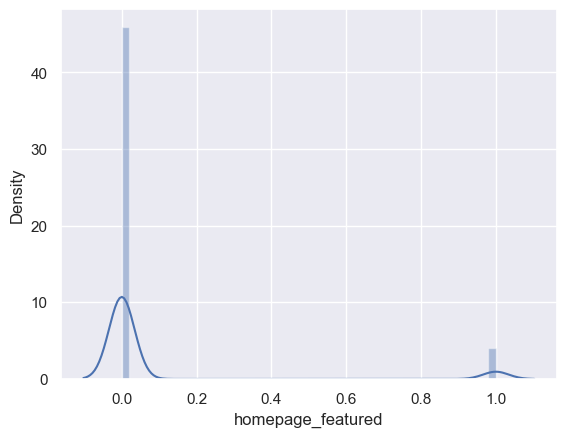

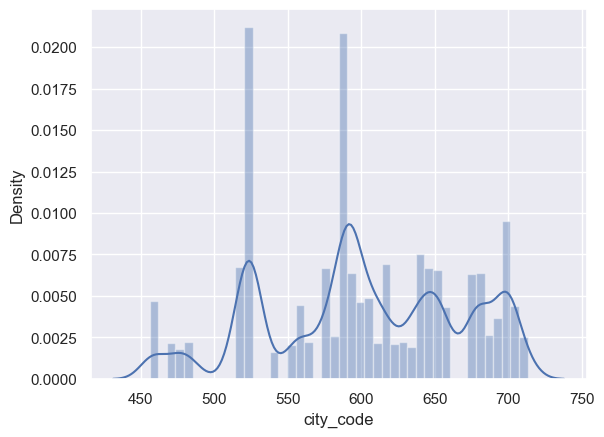

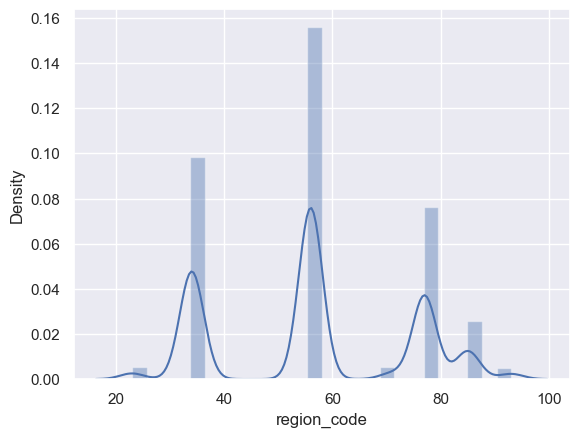

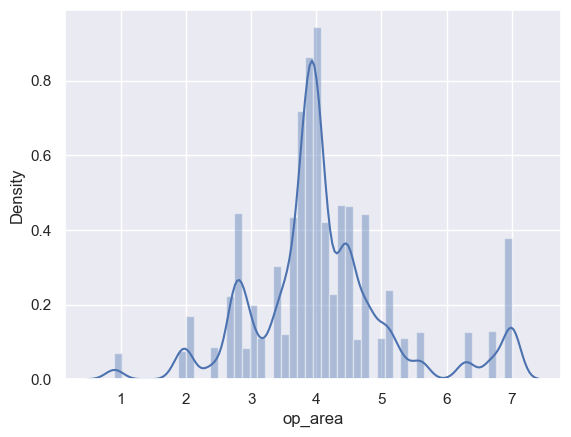

In [20]:
for i in num:
    sns.distplot(test_df[i])
    plt.show()

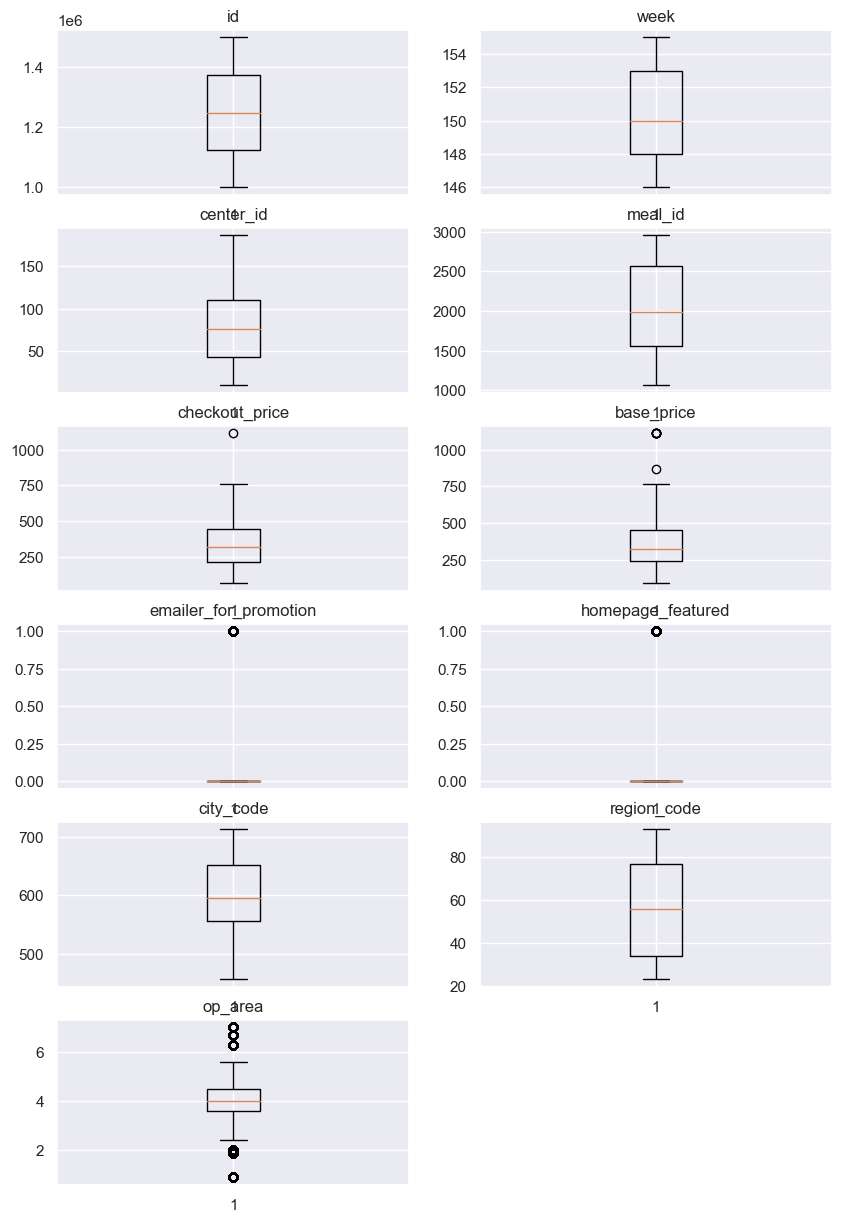

In [21]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(6,2,i+1)
    plt.title(column)
    plt.boxplot(test_df[column])
plt.show()

In [22]:
q1=np.quantile(test_df['base_price'],0.25)
q2=np.quantile(test_df['base_price'],0.50)
q3=np.quantile(test_df['base_price'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=test_df['base_price']>ub1
con2=test_df['base_price']<lb1
outlier=test_df[con1|con2]
len(outlier)

7

In [23]:
q1=np.quantile(test_df['checkout_price'],0.25)
q2=np.quantile(test_df['checkout_price'],0.50)
q3=np.quantile(test_df['checkout_price'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=test_df['checkout_price']>ub2
con2=test_df['checkout_price']<lb2
outlier1=test_df[con1|con2]
len(outlier1)

1

In [24]:
cat

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [25]:
corr=test_df.corr(numeric_only=True)
corr

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
id,1.000000,0.011176,0.008868,-0.002242,-0.012404,-0.010621,0.000697,-0.002035,-0.000612,-0.000757,-0.000812
week,0.011176,1.000000,-0.001295,0.003320,0.014100,-0.012672,-0.028666,-0.039336,-0.002964,-0.000347,0.000876
center_id,0.008868,-0.001295,1.000000,0.008715,-0.002326,-0.005593,0.008064,-0.005855,0.060390,-0.008435,-0.108784
meal_id,-0.002242,0.003320,0.008715,1.000000,0.043286,0.031053,-0.032147,0.002107,-0.004580,-0.010296,-0.004708
checkout_price,-0.012404,0.014100,-0.002326,0.043286,1.000000,0.967567,0.026338,-0.048799,-0.003050,0.008923,0.039577
base_price,-0.010621,-0.012672,-0.005593,0.031053,0.967567,1.000000,0.179885,0.043210,-0.000027,0.012914,0.036198
emailer_for_promotion,0.000697,-0.028666,0.008064,-0.032147,0.026338,0.179885,1.000000,0.460819,-0.003497,-0.002516,-0.020838
homepage_featured,-0.002035,-0.039336,-0.005855,0.002107,-0.048799,0.043210,0.460819,1.000000,0.000080,-0.010206,0.028240
city_code,-0.000612,-0.002964,0.060390,-0.004580,-0.003050,-0.000027,-0.003497,0.000080,1.000000,0.044260,0.132644
region_code,-0.000757,-0.000347,-0.008435,-0.010296,0.008923,0.012914,-0.002516,-0.010206,0.044260,1.000000,0.021620


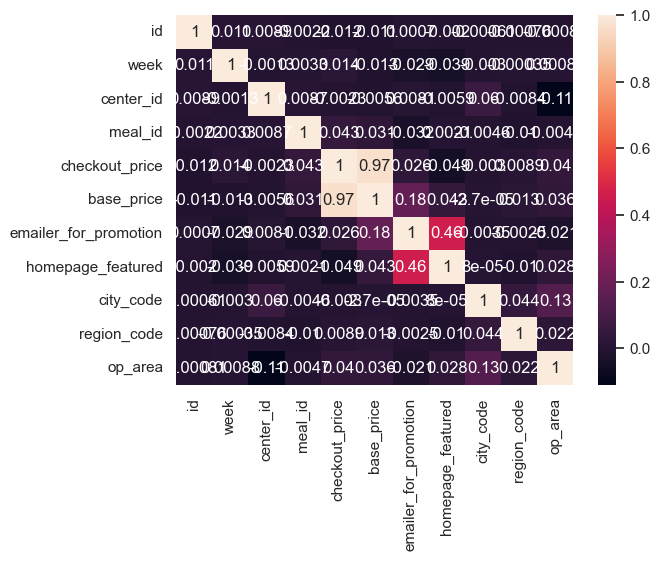

In [26]:
sns.heatmap(corr,annot=True)
plt.show()

In [27]:
df=test_df['id']
df

0        1028232
1        1262649
2        1453211
3        1262599
4        1495848
          ...   
32568    1412025
32569    1287019
32570    1396176
32571    1331977
32572    1017414
Name: id, Length: 32573, dtype: int64

In [28]:
col=['id']
test_df.drop(col,axis=1,inplace=True)

In [29]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    test_df[i]=le.fit_transform(test_df[i])

In [30]:
test_df

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,146,61,2104,583.03,581.03,0,0,473,77,0,4.5,4,0
32569,147,61,2104,582.03,582.03,0,1,473,77,0,4.5,4,0
32570,149,61,2104,629.53,629.53,0,0,473,77,0,4.5,4,0
32571,150,61,2104,629.53,629.53,0,0,473,77,0,4.5,4,0


In [31]:
pwd

'C:\\Users\\abhin\\Documents\\Food prediction Model'

In [40]:
import pickle
KN=pickle.load(open("food_.Best",'rb'))

In [41]:
y_pred_KNN=RF.predict(test_df)


In [42]:
pred_df=pd.DataFrame(y_pred_KNN,columns=['num_orders'])
pred_df

,num_orders
0,81.40
1,81.40
2,84.39
3,85.06
4,85.87
...,...
32568,43.15
32569,139.09
32570,43.20
32571,43.20


In [43]:
b= pd.concat([df,pred_df],axis =1)

In [44]:
b

,id,num_orders
0,1028232,81.40
1,1262649,81.40
2,1453211,84.39
3,1262599,85.06
4,1495848,85.87
...,...,...
32568,1412025,43.15
32569,1287019,139.09
32570,1396176,43.20
32571,1331977,43.20


In [45]:
b = b.set_index('id')
b

,num_orders
id,
1028232,81.40
1262649,81.40
1453211,84.39
1262599,85.06
1495848,85.87
...,...
1412025,43.15
1287019,139.09
1396176,43.20


In [46]:
b.to_csv('food_best_model_KN.csv')